In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
plt.rcParams["figure.figsize"] = (6.0, 6.0)
plt.rcParams["image.cmap"] = "gray"

# Read and Display the original Handwritten Signature

we are going to load the image in normal mode, which comes in BGR format by default. This is important to note because we will need to convert it to RGB later for display.

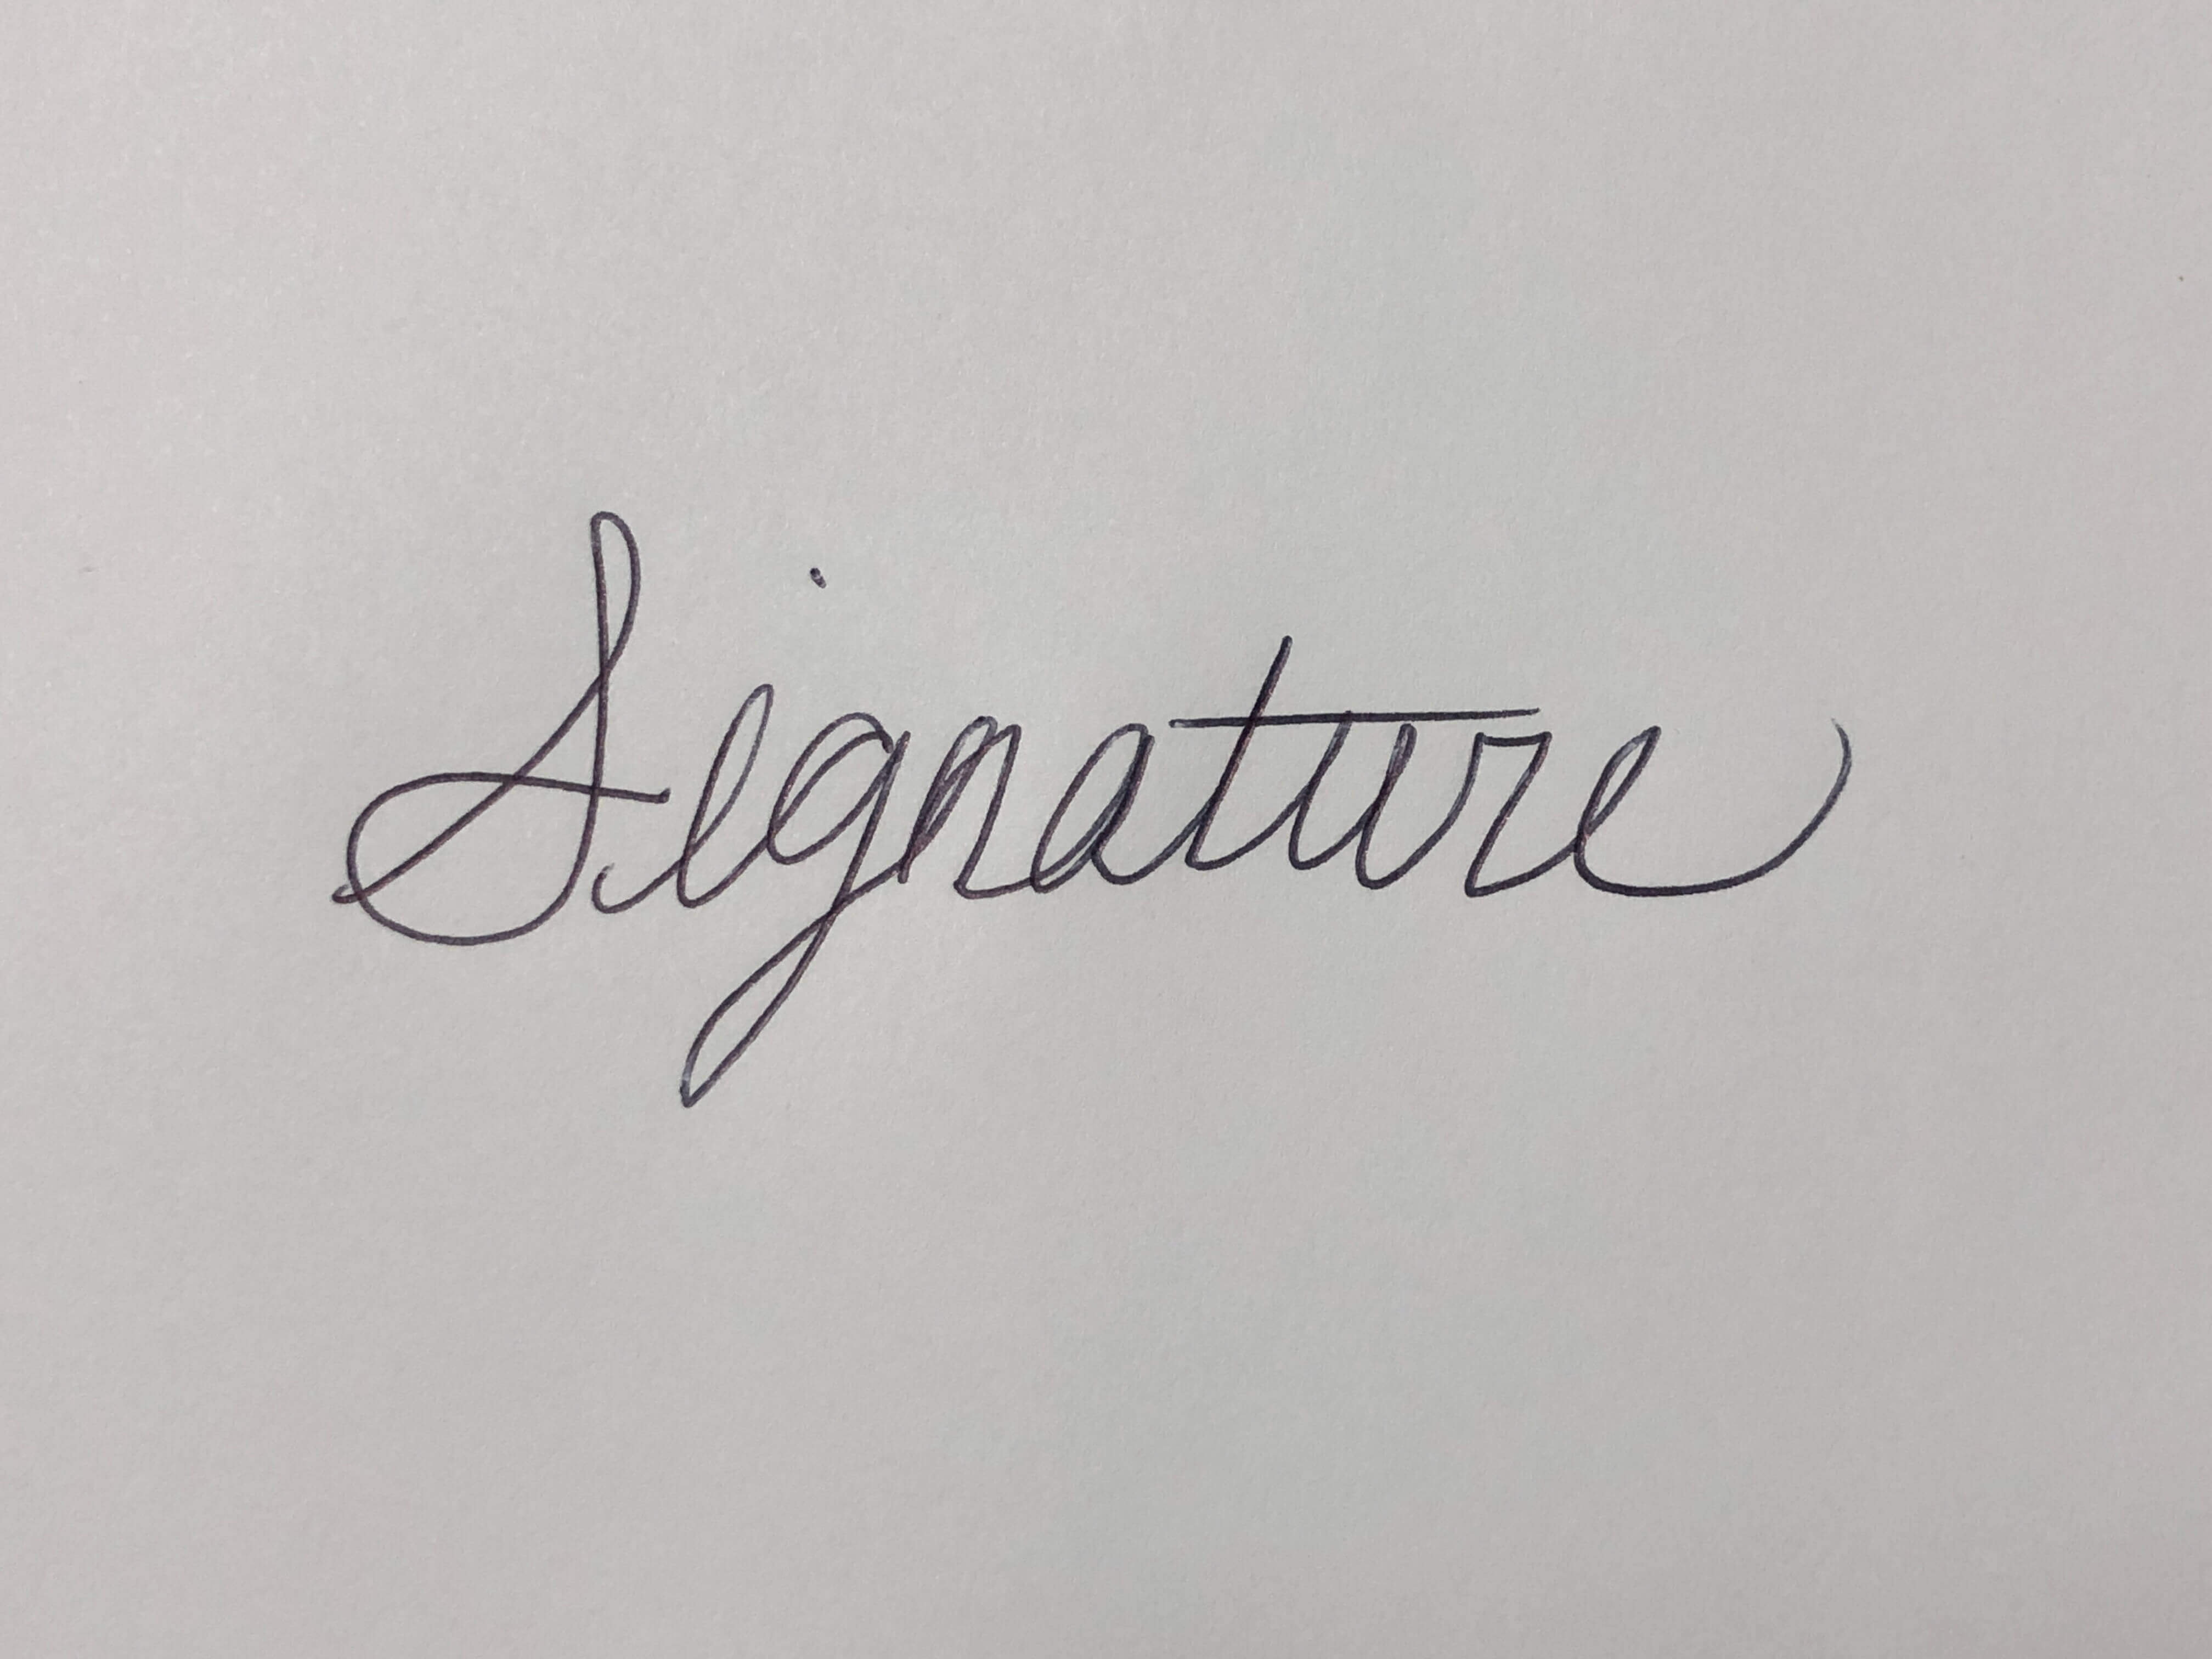

In [9]:
# Read the image
sig_org = cv2.imread("./signature.jpg", cv2.IMREAD_COLOR)

# Display the actual image
Image("./signature.jpg", width=400)

# Crop the Signature

This is going to be useful because it helps eliminate if there is any uneven lighting in areas of the image we don't care about it. Also makes it easier to use the signature that we create in a pdf editor because we're focused on the signature itself and not all the white space.

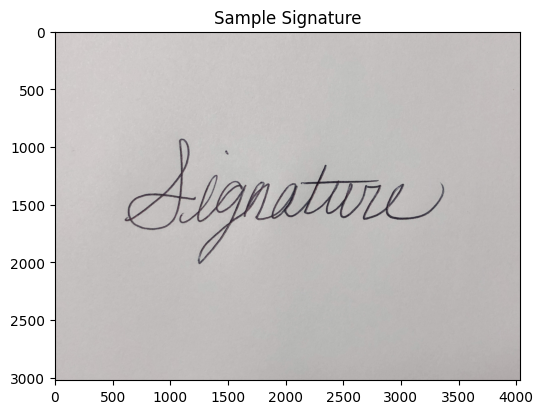

In [13]:
# Display the image using imshow() so we can see the size with axis
plt.imshow(sig_org[:, :, ::-1])
plt.title("Sample Signature");

### Crop the signature

This step is not tecnically required in this case. However, if the original image contained artifacts such as shadows or other markings on the paper, then cropping them out can be helpful prior to creating the alpha mask. Removing excess whitespace around the signature also makes it more convenient to work with a transform once brought into a PDF editor.

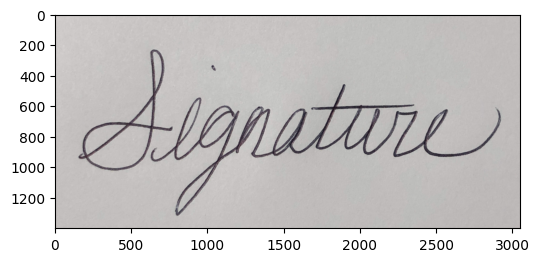

In [17]:
# Crop the signature from the original image
sig = sig_org[700:2100, 450:3500, :]
plt.imshow(sig[:, :, ::-1]);

## Convert to grayscale
### Working on creating that transparency or alpha channel

1. The first step is converting the signature in a grayscale image

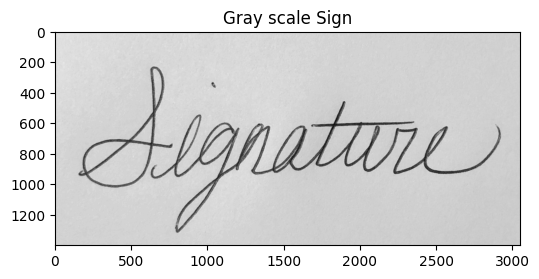

In [18]:
sig_gray = cv2.cvtColor(sig, cv2.COLOR_BGR2GRAY)
plt.imshow(sig_gray)
plt.title("Gray scale Sign");

## Create an Alpha Mask

Use the **threshold()** function to extract the alpha mask. This is how we are going to add transparency to our image by using the thresholding function.

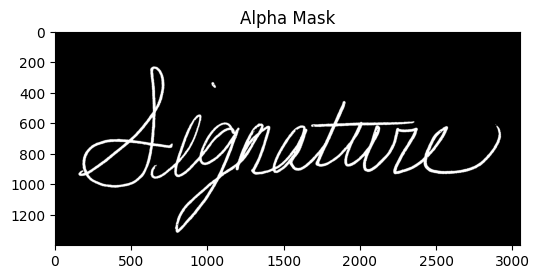

In [19]:
ret, alpha_mask = cv2.threshold(sig_gray, 150, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite("alpha_mask.jpg", alpha_mask)
plt.imshow(alpha_mask)
plt.title("Alpha Mask");

## Enhance the Color (optional)

This is an optional step in which we will enhance the color of the signature. There are numerous methods that can be used to accomplish this. Here we will use the **addWeighted()** function to blend the signature with a satured color.

The **addWeighted()** function functionally does an average weight of pixel values between two different images and blends them together.

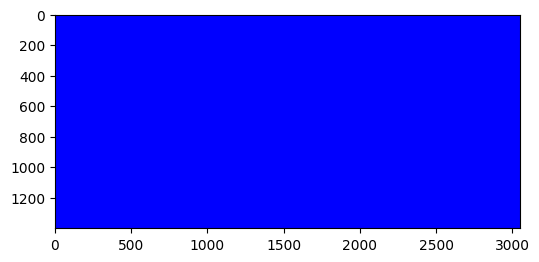

In [20]:
blue_mask = sig.copy()
blue_mask[:, :] = [255, 0, 0]
plt.imshow(blue_mask[:, :, ::-1]);

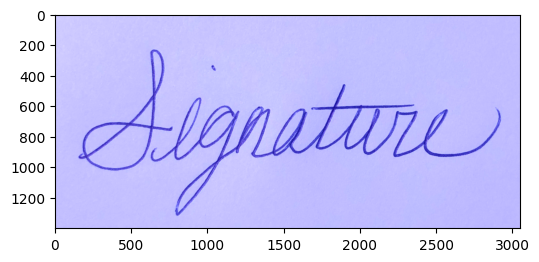

In [22]:
# Blend the signature with the mask
sig_color = cv2.addWeighted(sig, 1, blue_mask, 0.5, 0)
plt.imshow(sig_color[:, :, ::-1]);